In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':100})

In [2]:
df_co2 = pd.read_csv("data/pilot_3/VTE_C02_levels_pilot_3.csv", parse_dates=['Timestamp'])
df_filter = pd.read_csv("data/pilot_3/VTE_air_filter_use_pilot_3.csv", parse_dates=['Timestamp'])

In [7]:
df_co2['date'] = df_co2['timestamp'].dt.strftime('%d/%m/%Y')
df_co2 = df_co2[df_co2['date'] != '27/08/2021']

df_co2.columns = ['timestamp', 'turno',
       'grado_grupo',
       'recreo',
       'CO2_ppm', 'date']

df_co2 = df_co2[df_co2['grado_grupo'] != 'Administrativo']
df_co2['CO2_ppm'] = [(x * 1000) if x < 1 else x for x in df_co2['CO2_ppm']]
df_co2['days'] = (df_co2['timestamp'] - df_co2['timestamp'].min()).dt.days

In [23]:
df_filter.columns = ['timestamp', 
                     'turno',
                     'grado',    
                     'asistencia', 
                     'caso_covid', 
                     'uso_cubre_bocas', 
                     'uso_purificador', 
                     'razon_purificador', 
                     'uso_ventanas', 
                     'razon_ventanas', 
                     'uso_puerta', 
                     'razon_puerta',
                     'grupo']

In [24]:
df_filter = df_filter[df_filter['turno']=='Matutino']
df_filter['date'] = df_filter['timestamp'].dt.strftime('%d/%m/%Y')
df_filter['days'] = (df_filter['timestamp'] - df_filter['timestamp'].min()).dt.days

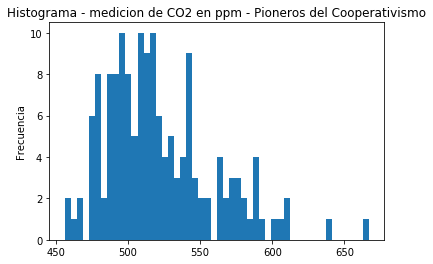

In [22]:
plt.hist(df_co2['CO2_ppm'], bins=50)
plt.gca().set(title='Histograma - medicion de CO2 en ppm - Pioneros del Cooperativismo', ylabel='Frecuencia')
plt.savefig('graphs/histogram_co2_pilot_3.png');

In [19]:
#grade_list = df_co2['Grado'].value_counts().index.sort_values().to_list()
younger_grades = ['Primero', 'Segundo', 'Tercero', 'Tercero ']#grade_list[:int(len(grade_list)/2)]
df_co2['lower_higher'] = ['lower grades' if x in younger_grades else 'higher grades' for x in df_co2['grado_grupo']]

In [16]:
df_co2['grado_grupo'].value_counts()

Sexto A               16
Sexto B               15
Quinto                15
Distancia             15
Cuarto                13
Primero               11
Segundo               11
Tercero               10
Tercero                6
5                      5
Segundo                5
Primero                5
Cuarto                 3
Administrativo         3
6 A                    2
1                      2
3                      2
2                      2
6 B                    2
2A                     2
4                      2
6b                     1
Quinto                 1
Salon a distsncia      1
6B                     1
Salon a distancia      1
Distancia              1
Name: grado_grupo, dtype: int64

,Timestamp,Turno,Grado,¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?,¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase (personal docente o alumnos)?,¿Cuál de las siguientes opciones describe mejor el uso del cubre bocas en este salón de clase?,¿Cuál de las siguientes opciones describe mejor el uso del purificador el día de hoy?,¿Cuál es la razón por la que no fue usado o estuvo apagado temporalmente el purificador?,¿Cuál de las siguientes opciones describe mejor la situación de las ventanas de este salón de clase?,¿Por qué razón se decidió cerrar o mantener cerradas las ventanas durante la jornada escolar de hoy?,¿Cuál de las siguientes opciones describe mejor la situación de la puerta principal de este salón de clase?,¿Por qué razón se decidió cerrar o mantener cerrada la puerta durante la jornada escolar de hoy?,Grupo
0,2021-09-20 12:53:01,Matutino,6A,8,No,Todas las personas en este salón utilizaron el...,El purificador se usó más de la mitad del tiempo,Hoy fue el primer doa de uso y llego al salón ...,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
1,2021-09-20 12:55:00,Matutino,2,9,No,Todas las personas en este salón utilizaron el...,El purificador se usó más de la mitad del tiempo,Primer día,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
2,2021-09-20 15:16:03,Matutino,5,7,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
3,2021-09-20 15:17:00,Matutino,5,7,No,Más de la mitad de las personas en este salón ...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
4,2021-09-20 15:23:29,Matutino,4 A,11,No,Todas las personas en este salón utilizaron el...,El purificador se usó más de la mitad del tiempo,Aún no lo tenía armado,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
5,2021-09-20 15:40:30,Matutino,Primero,13,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
6,2021-09-20 17:44:50,Matutino,6B,7,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,NaN
7,2021-09-20 19:56:28,Matutino,Otro,12,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas más de la mit...,Se tuvieron abiertas,La puerta estuvo abierta menos de la mitad del...,Por el ruido exterior,Otro
8,2021-09-20 21:35:25,Matutino,3ro,11,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,B
9,2021-09-21 12:39:26,Matutino,6to,4,No,Todas las personas en este salón utilizaron el...,El purificador se utilizó la totalidad de tiem...,NaN,Las ventanas estuvieron abiertas toda la jorna...,NaN,La puerta estuvo abierta toda la jornada escol...,NaN,A


In [208]:
grade_list = df_filter['grado'].value_counts().index.sort_values().to_list()
younger_grades = grade_list[:int(len(grade_list)/2)]
df_filter['lower_higher'] = [0 if x in younger_grades else 1 for x in df_filter['grado']]

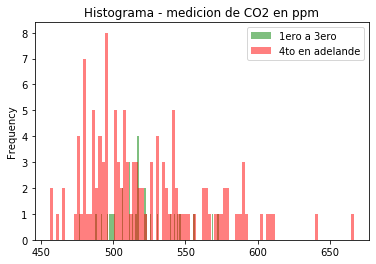

In [20]:
x1 = df_co2[df_co2['grado_grupo'].isin(younger_grades)][u'CO2_ppm']
x2 = df_co2[~df_co2['grado_grupo'].isin(younger_grades)][u'CO2_ppm']
kwargs = dict(alpha=0.5, bins=100)
plt.hist(x1, **kwargs, color='g', label='1ero a 3ero')
plt.hist(x2, **kwargs, color='r', label='4to en adelande')
plt.gca().set(title='Histograma - medicion de CO2 en ppm', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();
plt.savefig('graphs/histogram_co2_higher_lower_pilot_1.png');

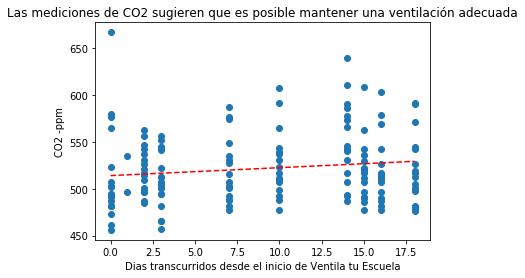

In [21]:
x = df_co2['days']
y = df_co2['CO2_ppm']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.title("Las mediciones de CO2 sugieren que es posible mantener una ventilación adecuada")
plt.xlabel("Dias transcurridos desde el inicio de Ventila tu Escuela")
plt.ylabel("CO2 -ppm")
plt.plot(x,p(x),"r--");
plt.savefig('graphs/scatter_co2_pilot_1.png');

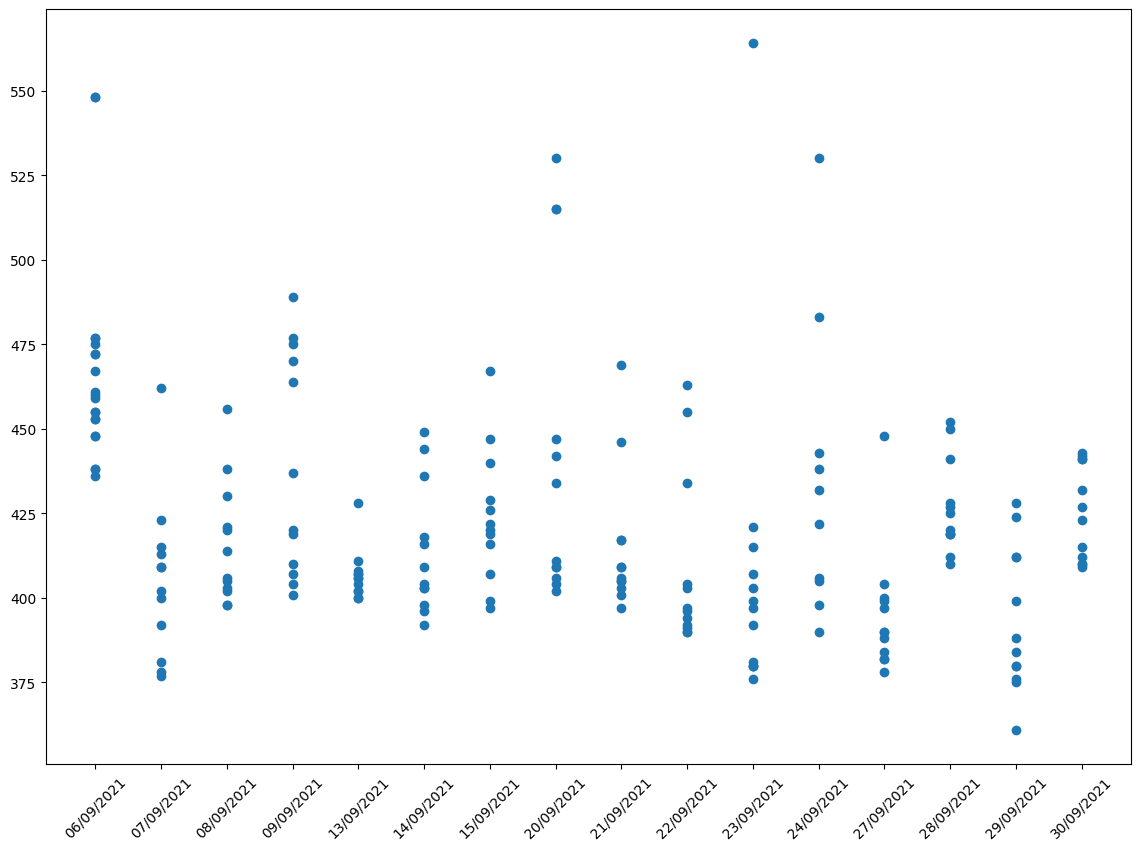

In [116]:
plt.plot_date(df_co2['date'], df_co2['CO2_ppm'])
plt.xticks(rotation = 45)
plt.show;

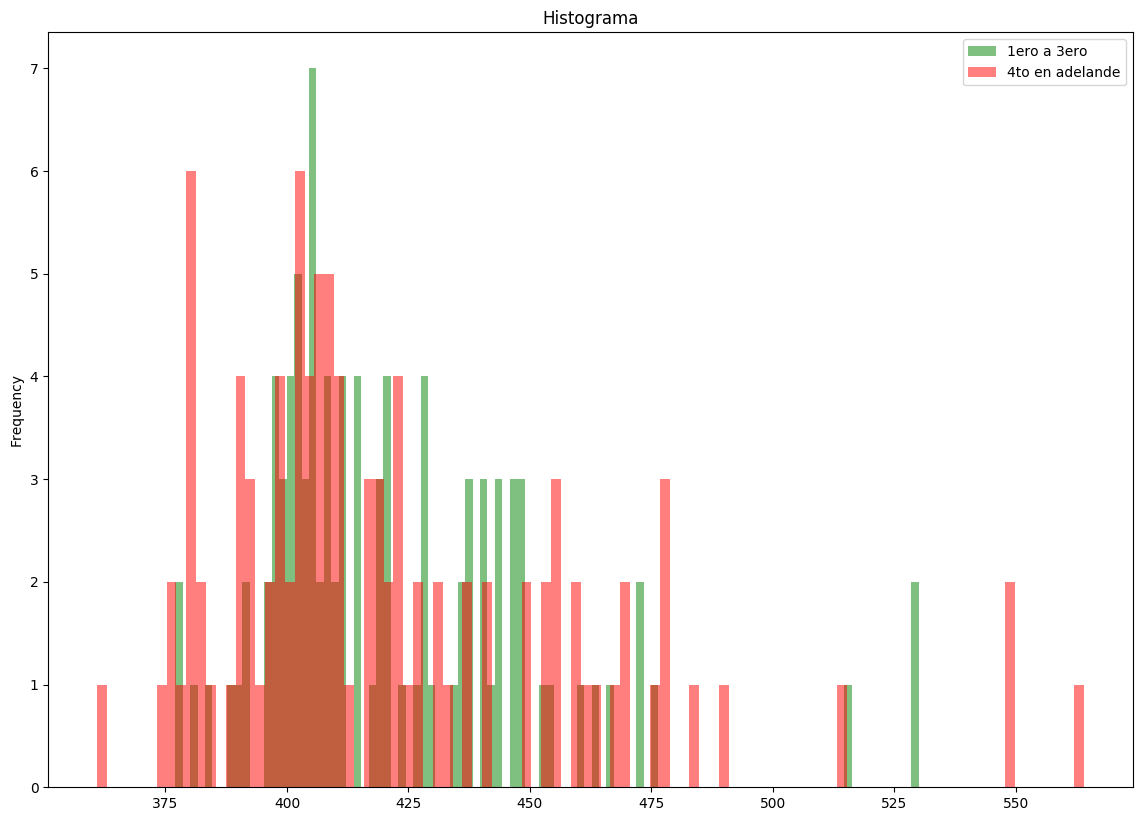

In [121]:
y1 = df_co2[df_co2['Recreo'] == 'Primera medición: después del ingreso y antes del recreo'][u'CO2_ppm']
y2 = df_co2[df_co2['Recreo'] == 'Segunda medición: después del recreo y antes de la salida de clases'][u'CO2_ppm']
kwargs = dict(alpha=0.5, bins=100)

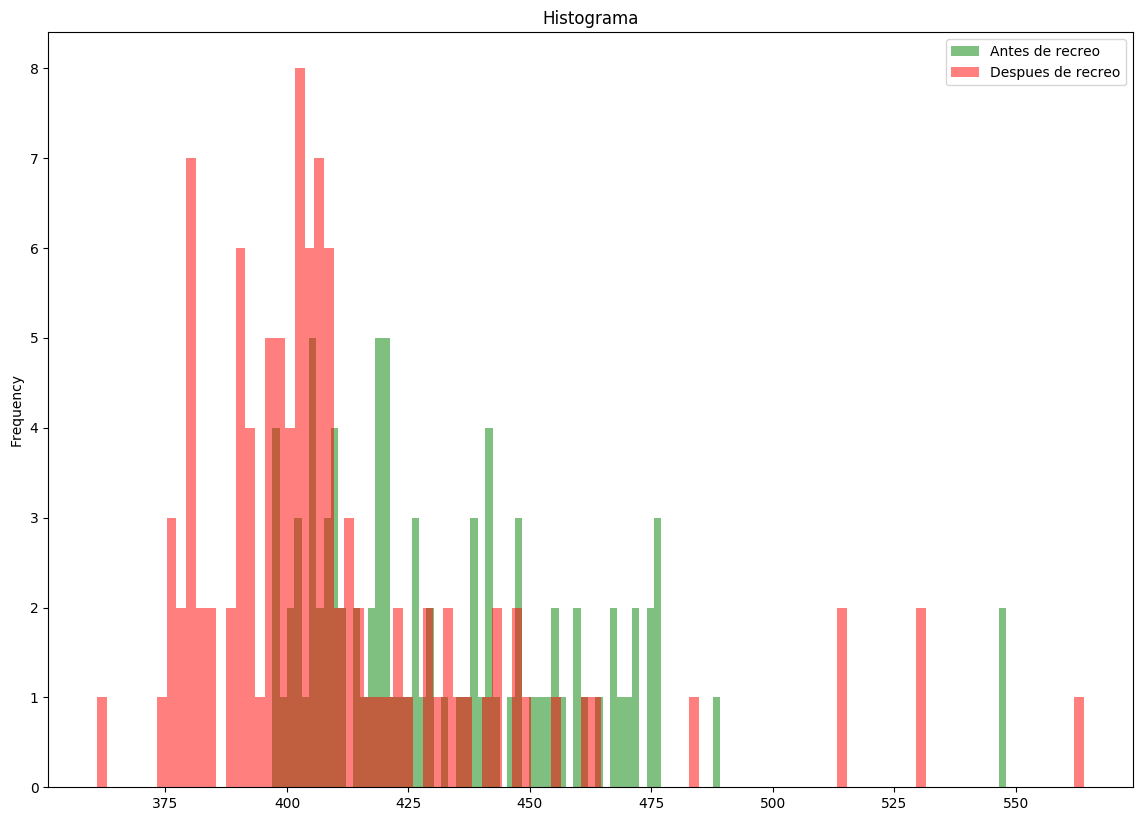

In [122]:
plt.hist(y1, **kwargs, color='g', label='Antes de recreo')
plt.hist(y2, **kwargs, color='r', label='Despues de recreo')
plt.gca().set(title='Histograma', ylabel='Frequency')
#plt.xlim(50,75)
plt.legend();

In [25]:
df_filter['asistencia'].value_counts()

7     9
12    8
10    7
8     7
6     6
14    3
13    3
11    3
5     3
15    2
9     2
4     1
Name: asistencia, dtype: int64

In [129]:
df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'] = df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].str.replace(' alumnos', '').str.replace('Tres', '3').str.replace('Seis', '6').str.replace('personas', '').str.strip(" ").str.replace(' personal de la UDEEI-150', '').str.replace('Somos ', '')

df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'] = df_filter['¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?'].astype(int)

In [179]:
df_filter[df_filter.columns[4]].value_counts()

No         102
No sabe     18
Name:  ¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase  (personal docente o alumnos)?, dtype: int64

In [172]:
df_filter.columns

Index(['Timestamp', 'Grado escolar (Aula de cómputo u oficinas marcar "otro")',
       'Grupo',
       '¿Cuántos alumnos en total asistieron a clase a este salón de clase el día de hoy?',
       ' ¿Se reportó HOY algún nuevo caso de Covid en alguna persona que haya usado este salón de clase  (personal docente o alumnos)?',
       '¿Cuál de las siguientes opciones describe mejor el uso del cubre bocas en este salón de clase?',
       '¿Cuál de las siguientes opciones describe mejor el uso del purificador el día de hoy?',
       '¿Cuál es la razón por la que no fue usado o estuvo apagado temporalmente el purificador?',
       '¿Cuál de las siguientes opciones describe mejor la situación de las ventanas de este salón de clase?',
       '¿Por qué razón se decidió cerrar o mantener cerradas las ventanas durante la jornada escolar de hoy?',
       '¿Cuál de las siguientes opciones describe mejor la situación de la puerta principal de este salón de clase?',
       '¿Por qué razón se decidió c

In [208]:
df_filter.date.value_counts().sort_index()

09/01/2021    12
09/02/2021    12
09/06/2021    12
09/07/2021    11
09/08/2021     9
09/09/2021     7
09/10/2021     3
13/09/2021    12
14/09/2021    11
30/08/2021    14
31/08/2021    12
Name: date, dtype: int64

In [209]:
url_1 = "https://docs.google.com/spreadsheets/d/15RiJu-vsM61rgmHGJV1BQaT2m6nBX_Y4Vc1N82rdLs4/edit?resourcekey#gid=1880725359"

In [218]:
df_co2

,Timestamp,Turno,"Grado escolar (Aula de cómputo u oficinas marcar ""otro"")",Grupo,¿Qué medición está reportando?,¿Cuál es el nivel de CO2 a reportar?
0,8/27/2021 13:32:54,NaN,1ero,A,Primera medición: después del ingreso y antes ...,580
1,8/27/2021 13:33:11,NaN,5to,A,Primera medición: después del ingreso y antes ...,615
2,8/27/2021 13:33:15,NaN,4to,A,Primera medición: después del ingreso y antes ...,720
3,8/27/2021 13:33:16,NaN,2do,B,Primera medición: después del ingreso y antes ...,698
4,8/27/2021 13:33:23,NaN,1ero,B,Primera medición: después del ingreso y antes ...,455
5,8/27/2021 13:33:23,NaN,Otro,No aplica,Primera medición: después del ingreso y antes ...,600
6,8/27/2021 13:33:25,NaN,6to,B,Primera medición: después del ingreso y antes ...,560
7,8/27/2021 13:33:27,NaN,4to,B,Primera medición: después del ingreso y antes ...,600
8,8/27/2021 13:33:30,NaN,1ero,A,Segunda medición: después del recreo y antes d...,780
9,8/27/2021 13:33:39,NaN,3ero,B,Primera medición: después del ingreso y antes ...,500


In [270]:
df_co2.Recreo.str.startswith('Primera medición').value_counts()

True     55
False    36
Name: Recreo, dtype: int64

In [276]:
df_co2[df_co2['Recreo'].str.startswith('Primera medición')]

ValueError: cannot index with vector containing NA / NaN values

In [277]:
df_co2.Recreo.value_counts()

Primera medición: después del ingreso y antes del recreo               55
Segunda medición: después del recreo y antes de la salida de clases    36
Name: Recreo, dtype: int64

In [138]:
df_co2

,Timestamp,Turno,Grado,Grupo,Recreo,CO2_ppm,date,days,lower_higher
12,2021-09-06 10:12:34,Matutino,6to,A,Primera medición: después del ingreso y antes ...,438.0,06/09/2021,0,higher grades
13,2021-09-06 13:09:43,Matutino,1ero,A,Primera medición: después del ingreso y antes ...,461.0,06/09/2021,0,lower grades
14,2021-09-06 13:10:10,Matutino,1ero,B,Primera medición: después del ingreso y antes ...,467.0,06/09/2021,0,lower grades
15,2021-09-06 13:11:06,Matutino,2do,A,Primera medición: después del ingreso y antes ...,436.0,06/09/2021,0,lower grades
16,2021-09-06 13:13:55,Matutino,2do,B,Primera medición: después del ingreso y antes ...,448.0,06/09/2021,0,lower grades
17,2021-09-06 13:14:50,Matutino,3ero,A,Primera medición: después del ingreso y antes ...,472.0,06/09/2021,0,lower grades
18,2021-09-06 13:15:20,Matutino,3ero,B,Primera medición: después del ingreso y antes ...,475.0,06/09/2021,0,lower grades
19,2021-09-06 13:15:50,Matutino,4to,A,Primera medición: después del ingreso y antes ...,548.0,06/09/2021,0,higher grades
20,2021-09-06 13:16:08,Matutino,3ero,A,Primera medición: después del ingreso y antes ...,472.0,06/09/2021,0,lower grades
21,2021-09-06 13:16:18,Matutino,4to,B,Primera medición: después del ingreso y antes ...,455.0,06/09/2021,0,higher grades


In [198]:
df_filter.asistencia.value_counts()

7     46
6     40
8     39
5     35
9     27
4     19
10    12
11     9
3      7
15     1
13     1
Name: asistencia, dtype: int64

In [224]:
df_filter['asistencia'] = df_filter.asistencia.str.replace(' alumnos', '').str.replace('Tres', '3').str.replace('Seis', '6').astype(int)

In [225]:
df_filter['asistencia']

12      4
13      7
14      3
15      6
16      6
17      8
18     10
19      5
20      7
21     10
22      6
23      6
24      7
25      7
30      4
31      7
32      5
33      5
34      9
35      4
36      6
37      6
38     10
39      6
40      6
41      7
45     10
46      7
47      4
48      5
       ..
267     9
268     4
269     8
270     6
271    11
272     6
273    10
274    10
275     7
276     7
277    10
278     7
279    10
280     7
281     8
282     6
283     6
284     5
285    10
286     8
287     9
288     5
289     8
290     5
291     7
292     4
293    10
294    11
295     8
296     7
Name: asistencia, Length: 256, dtype: int64

/Users/AbreuLastra_Work/anaconda2/envs/pithon3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


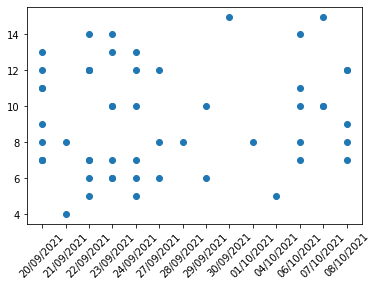

In [26]:
plt.plot_date(df_filter['date'], df_filter['asistencia'])
plt.xticks(rotation = 45)
plt.show;

TypeError: cannot convert the series to <class 'int'>

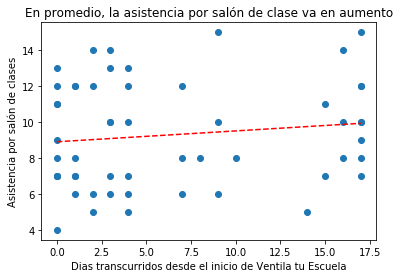

In [30]:
x = df_filter['days']
y = df_filter['asistencia']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.title("En promedio, la asistencia por salón de clase va en aumento")
plt.xlabel("Dias transcurridos desde el inicio de Ventila tu Escuela")
plt.ylabel("Asistencia por salón de clases")
plt.plot(x,p(x),"r--");
plt.savefig('graphs/scatter_asistencia_3.png');

In [41]:
df= pd.DataFrame

In [51]:
df = df_filter.groupby(['days']).asistencia.mean()

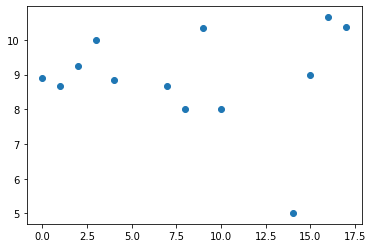

In [56]:
plt.scatter(df.index,df)

days  grado  grupo
0     3ro    B        11.0
      6to    A         4.0
      Otro   Otro     12.0
1     2do    A         7.0
      4to    A        12.0
      5to    Otro      7.0
      6to    A         7.0
2     1ro    C        14.0
      3ro    B        12.0
      6to    A         6.0
             B         5.0
3     1ro    C        14.0
      2do    A        10.0
      3ro    A        10.0
      4to    A        13.0
      5to    Otro      6.0
      6to    B         7.0
4     1ro    C        13.0
      3ro    A        10.0
      4to    A        12.0
      5to    A         5.0
      6to    A         6.0
             B         7.0
7     4to    A        12.0
      5to    A         8.0
      6to    A         6.0
8     5to    A         8.0
9     4to    A        15.0
      5to    A        10.0
      6to    A         6.0
10    5to    A         8.0
14    5to    A         5.0
15    4to    A        11.0
      6to    A         7.0
16    1ro    C        14.0
      2do    A        10.0
      5to

In [66]:
df_co2['CO2_ppm'].describe()

count    153.000000
mean     521.575163
std       37.875956
min      456.000000
25%      494.000000
50%      513.000000
75%      542.000000
max      667.000000
Name: CO2_ppm, dtype: float64